In [1]:
import os
import sys
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform
import pathlib
import numpy as np
import random
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: Windows-10-10.0.22621-SP0
Tensor Flow Version: 2.10.0
Keras Version: 2.10.0

Python 3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]
Pandas 1.5.1
Scikit-Learn 1.1.3
SciPy 1.9.3
GPU is available


In [2]:
# Variables and params
batch_size = 128
img_height = 100
img_width = 100

train_root = pathlib.Path('../FruitScale/data/Training')
train_root = train_root.resolve()

test_root = pathlib.Path('../FruitScale/data/Test')
test_root = test_root.resolve()

fireTest_root = pathlib.Path('../FruitScale/data/FireTest')
fireTest_root = fireTest_root.resolve()

image_count = len(list(train_root.glob('*/*.jpg')))

random.seed(42)
#print(train_root)

In [3]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_root,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 67692 files belonging to 131 classes.
Using 54154 files for training.


In [4]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_root,
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
print(val_data)

Found 67692 files belonging to 131 classes.
Using 13538 files for validation.
<BatchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [5]:
class_names = train_data.class_names
num_classes = len(class_names)

In [6]:
## TODO: rotate, change brighness, rescale, zoom
datagen = ImageDataGenerator(
    #preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
    validation_split=0.2,
    rotation_range=90,
    width_shift_range=0.5,
    height_shift_range=0.5,
    brightness_range=[0.5,1.0],
    zoom_range=[0.5,1.0],
    horizontal_flip=True,
    vertical_flip=True,


)

train_generator = datagen.flow_from_directory(
    train_root,
    target_size=(224,224),
    subset="training",
    batch_size = 500,
    #class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    train_root,
    target_size=(224,224),
    subset="validation",
    batch_size = 500,
    #class_mode='categorical'
)

testDatagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
)

test_generator = testDatagen.flow_from_directory(
    test_root,
    target_size=(224,224),
    batch_size = 500,
    #class_mode='categorical'
)


Found 54190 images belonging to 131 classes.
Found 13502 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


C:\Workspace\FruitScale\data\Training\Cherry 1\r_253_100.jpg


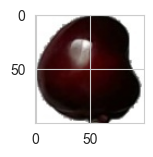

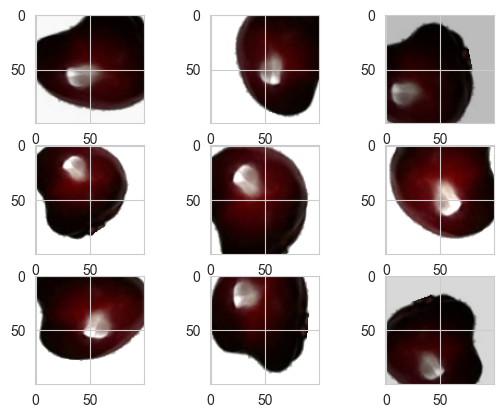

In [58]:
# Importing the required libraries
from numpy import expand_dims
#from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot


all_image_paths = list(train_root.glob('*/*'))
x = random.randrange(0, len(all_image_paths))
print(all_image_paths[x])
#x=random.choice(os.listdir(str(all_image_paths)))
#print(x)
img=plt.imread(all_image_paths[x])
pyplot.subplot(330 + 1)
pyplot.imshow(img)
pyplot.show()
# For processing, we are converting the image(s) to an array
data = keras.preprocessing.image.img_to_array(img)

# Expanding dimension to one sample
samples = expand_dims(data, 0)

# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(
    #preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
    #validation_split=0.2,
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.5,1.5],
    zoom_range=[0.8, 1.1],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="constant",
    cval=255



)

# Creating an iterator for data augmentation
it = datagen.flow(samples, batch_size=1)

# Preparing the Samples and Plot for displaying output
for i in range(9):
    # preparing the subplot
    pyplot.subplot(330 + 1 + i)
    # generating images in batches
    batch = it.next()
    # Remember to convert these images to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # Plotting the data
    pyplot.imshow(image)
# Displaying the figure
pyplot.show()

In [46]:
imgs,labels=next(train_generator)
np.shape(imgs)

(500, 224, 224, 3)

In [5]:
imgs,labels=next(test_generator)
np.shape(imgs)

(500, 224, 224, 3)

In [6]:
mobile_net=tf.keras.applications.mobilenet.MobileNet(
    weights="imagenet"
)
mobile_net.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [7]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [8]:
model=keras.Sequential()
for layer in mobile_net.layers[:-1]:
    model.add(layer)

for layer in model.layers:
    layer.trainable=False

In [9]:
#model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(1024,activation='relu'))
#model.add(keras.layers.Dense(256,activation='relu'))
#model.add(keras.layers.Softmax())
model.add(keras.layers.Dense(131,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                          
                                                                 
 conv_dw_1_relu (ReLU)       (None, 112, 112, 32)      0

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(
    train_generator,
    epochs=25,
    validation_data = val_generator, verbose=1,
    callbacks=[early_stop],
    batch_size = 10000000 # BATCH_SIZE
)

Epoch 1/25
 15/109 [===>..........................] - ETA: 4:04 - loss: 3.9696 - accuracy: 0.1512

KeyboardInterrupt: 

In [ ]:
loss, acc = model.evaluate(test_generator)
print('Loss:', loss)
print('Accuracy:', acc)

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
import cv2

x=random.choice(os.listdir(str(test_root)+'/Banana'))
print(x)
img=plt.imread(os.path.join(str(test_root)+'/Banana',x))
img=cv2.resize(img,dsize=(224,224))
img_new=keras.applications.mobilenet.preprocess_input(img)
plt.imshow(img)

In [ ]:
model.predict(np.expand_dims(img_new,0)).round(2)

In [ ]:
index = train_generator.class_indices
print (index)

In [ ]:
x=random.choice(os.listdir(str(fireTest_root)))
print(x)
img=plt.imread(os.path.join(str(fireTest_root),x))
img=cv2.resize(img,dsize=(224,224))
img_new=keras.applications.mobilenet.preprocess_input(img)
plt.imshow(img)

In [ ]:
predictions = model.predict(np.expand_dims(img_new,0)).round(2)[0]
i = 0
for prediction in predictions:
    if prediction > 0.0:
        k = 0
        for a,b in index.items():
            if k == i:
                print(a + ": " + str(prediction))
            k = k + 1
    i = i+1

In [ ]:
model.save("trained_mobilenet.h5")

In [ ]:
new_model = tf.keras.models.load_model('trained_mobilenet.h5')

In [ ]:
new_model.summary()